# **Naive Bayes Classifier Project**

##### This project will create a simple Naive Bayes model that will classify penguins as male or female based on existing variables. I downloaded the dataset from the following link https://www.kaggle.com/datasets/youssefaboelwafa/clustering-penguins-species.

In [16]:
# import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [2]:
# import data
df = pd.read_csv('penguins.csv')
df

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
3,NaN,NaN,NaN,NaN,NaN
4,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...
339,NaN,NaN,NaN,NaN,NaN
340,46.8,14.3,215.0,4850.0,FEMALE
341,50.4,15.7,222.0,5750.0,MALE
342,45.2,14.8,212.0,5200.0,FEMALE


In [3]:
# check data types
df.dtypes

culmen_length_mm     float64
culmen_depth_mm      float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
dtype: object

In [4]:
# check missing value
df.isnull().sum()

culmen_length_mm     2
culmen_depth_mm      2
flipper_length_mm    2
body_mass_g          2
sex                  9
dtype: int64

In [5]:
# drop missing value
df.dropna(inplace=True)
df.isnull().sum()

culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [6]:
df

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
4,36.7,19.3,193.0,3450.0,FEMALE
5,39.3,20.6,190.0,3650.0,MALE
...,...,...,...,...,...
338,47.2,13.7,214.0,4925.0,FEMALE
340,46.8,14.3,215.0,4850.0,FEMALE
341,50.4,15.7,222.0,5750.0,MALE
342,45.2,14.8,212.0,5200.0,FEMALE


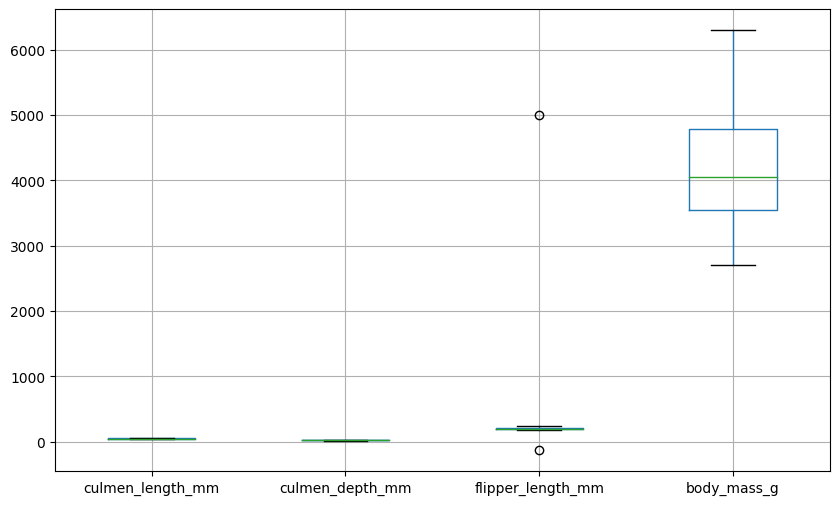

In [17]:
# check outliers
plt.figure(figsize=(10, 6))
df.boxplot()
plt.show()

In [8]:
# get q1 and q3, and also iqr
q1 = df['flipper_length_mm'].quantile(0.25)
q3 = df['flipper_length_mm'].quantile(0.75)
iqr = q3 - q1

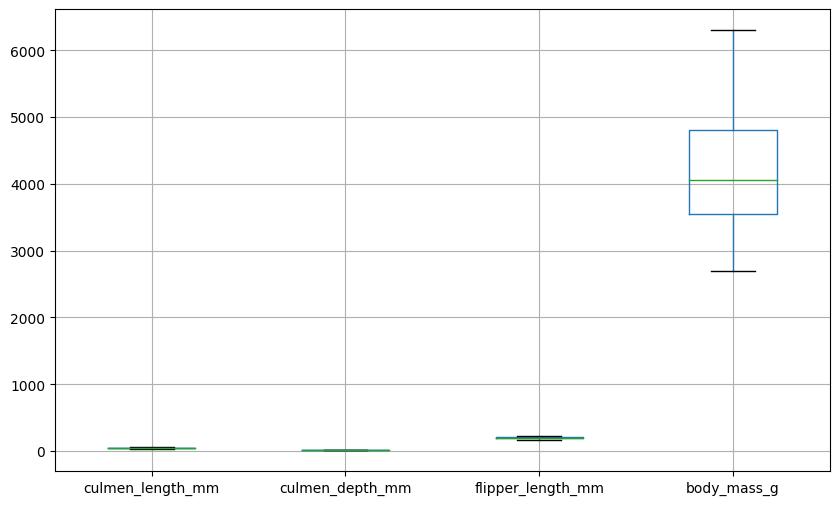

In [18]:
# create a boolean mask to identify rows with outliers
is_outlier = (df['flipper_length_mm'] < (q1 - 1.5 * iqr)) | (df['flipper_length_mm'] > (q3 + 1.5 * iqr))

# drop rows with outliers
df_filtered = df[~is_outlier]

plt.figure(figsize=(10,6))
df_filtered.boxplot()
plt.show()

In [23]:
df_filtered.describe().T

,count,mean,std,min,25%,50%,75%,max
culmen_length_mm,333.0,44.022523,5.444308,32.1,39.5,44.5,48.6,59.6
culmen_depth_mm,333.0,17.148649,1.958940,13.1,15.6,17.3,18.7,21.5
flipper_length_mm,333.0,201.024024,14.042299,172.0,190.0,197.0,213.0,231.0
body_mass_g,333.0,4208.483483,805.978992,2700.0,3550.0,4050.0,4800.0,6300.0


# **LETS GO MODELLING**

In [26]:
df_filtered.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,333.000000,333.000000,333.000000,333.000000
mean,44.022523,17.148649,201.024024,4208.483483
std,5.444308,1.958940,14.042299,805.978992
min,32.100000,13.100000,172.000000,2700.000000
25%,39.500000,15.600000,190.000000,3550.000000
50%,44.500000,17.300000,197.000000,4050.000000
75%,48.600000,18.700000,213.000000,4800.000000
max,59.600000,21.500000,231.000000,6300.000000


In [36]:
df_numerical = df_filtered.select_dtypes(include=[np.number])  # Select numerical columns
df_categorical = df_filtered.select_dtypes(include=[object])  # Select categorical columns (strings)

print('numerical data from this dataset is : \n', df_numerical.count())
print('categorical data from this dataset is : \n', df_categorical.count())

numerical data from this dataset is : 
 culmen_length_mm     333
culmen_depth_mm      333
flipper_length_mm    333
body_mass_g          333
dtype: int64
categorical data from this dataset is : 
 sex    333
dtype: int64


In [40]:
# normalize data
scaler = MinMaxScaler(feature_range=(0, 1))  # Adjust range if needed (e.g., (-1, 1))
df_scaled = pd.DataFrame(scaler.fit_transform(df_numerical))  # Transform the data

print(df_scaled.head())  # View the scaled DataFrameD

          0         1         2         3
0  0.254545  0.666667  0.152542  0.291667
1  0.269091  0.511905  0.237288  0.305556
2  0.298182  0.583333  0.389831  0.152778
3  0.167273  0.738095  0.355932  0.208333
4  0.261818  0.892857  0.305085  0.263889


In [42]:
X = df_scaled
y = df_categorical

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# naive bayes model
model = GaussianNB()

# train the model
model.fit(X_train, y_train)

# predict model with testing data
predicted_y = model.predict(X_test)

# Contoh: Hitung akurasi
accuracy = accuracy_score(y_test, predicted_y)
print('model accuration is :', accuracy)

model accuration is : 0.7761194029850746


c:\Users\ASUS A409JP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [15]:
pd.set_option('display.max_rows', None)

result = pd.DataFrame({'actual value': y_test, 'predicted value': predicted_y})
matrix = confusion_matrix(y_test, predicted_y)

print(classification_report(y_test, predicted_y))
print('confusion matrix of this analysis is: \n', matrix)
print('actual value vs predicted value: \n', result)

              precision    recall  f1-score   support

      FEMALE       0.68      0.94      0.79        34
        MALE       0.90      0.55      0.68        33

    accuracy                           0.75        67
   macro avg       0.79      0.74      0.73        67
weighted avg       0.79      0.75      0.74        67

confusion matrix of this analysis is: 
 [[32  2]
 [15 18]]
actual value vs predicted value: 
     actual value predicted value
29          MALE          FEMALE
114       FEMALE            MALE
81          MALE          FEMALE
201       FEMALE          FEMALE
62        FEMALE          FEMALE
261         MALE            MALE
187       FEMALE          FEMALE
186         MALE          FEMALE
280       FEMALE          FEMALE
203         MALE            MALE
77          MALE          FEMALE
13          MALE            MALE
277         MALE            MALE
323         MALE            MALE
177         MALE            MALE
207         MALE            MALE
80        FEMALE  